<a href="https://colab.research.google.com/github/habiburrachman08/habiburrachman08/blob/main/tugas11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [7]:
ls

tugas10.ipynb  tugas11/  TUGASTEN/  Untitled0.ipynb


In [8]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [14]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("tugas11")
data = []
labels = []

[INFO] loading images...


In [17]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((32, 32))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [18]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [19]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [20]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [21]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(441, 32, 32, 3)
(148, 32, 32, 3)


In [22]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(99, (3,3), activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(129, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 99)        2772      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 99)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 129)       115068    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 129)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4644)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               464500    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [23]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


[INFO] training network...


In [24]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)


Epoch 1/25
14/14 [==============================] - 4s 283ms/step - loss: 1.6085 - accuracy: 0.2540 - val_loss: 1.5935 - val_accuracy: 0.1892
Epoch 2/25
14/14 [==============================] - 4s 283ms/step - loss: 1.4525 - accuracy: 0.4082 - val_loss: 1.4965 - val_accuracy: 0.3041
Epoch 3/25
14/14 [==============================] - 2s 154ms/step - loss: 1.3585 - accuracy: 0.4104 - val_loss: 1.4449 - val_accuracy: 0.3514
Epoch 4/25
14/14 [==============================] - 2s 150ms/step - loss: 1.2554 - accuracy: 0.4807 - val_loss: 1.3320 - val_accuracy: 0.3716
Epoch 5/25
14/14 [==============================] - 2s 150ms/step - loss: 1.1536 - accuracy: 0.5238 - val_loss: 1.2864 - val_accuracy: 0.3716
Epoch 6/25
14/14 [==============================] - 2s 148ms/step - loss: 1.1180 - accuracy: 0.5556 - val_loss: 1.2201 - val_accuracy: 0.4459
Epoch 7/25
14/14 [==============================] - 2s 170ms/step - loss: 1.0136 - accuracy: 0.5805 - val_loss: 1.2037 - val_accuracy: 0.4865
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


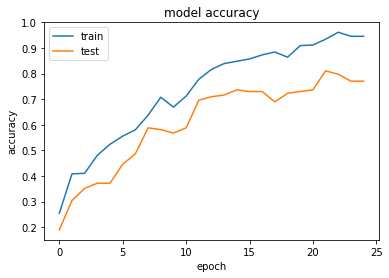

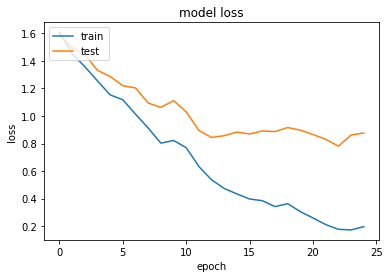

In [25]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.95      0.81      0.88        26
      GMB_03       0.88      0.92      0.90        24
      GMB_04       0.76      0.51      0.61        37
      GMB_05       0.74      0.86      0.80        37
      GMB_06       0.61      0.83      0.70        24

    accuracy                           0.77       148
   macro avg       0.79      0.79      0.78       148
weighted avg       0.78      0.77      0.77       148



In [27]:
model1.save('habibur')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: habibur/assets


In [28]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200827_203559.jpg'

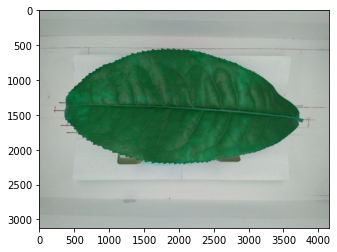

In [31]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [32]:
image_testing = Image.open('IMG_20200827_203559.jpg')
image_testing = np.array(image_testing.resize((32, 32))) / 255.0
image_testing.shape

(32, 32, 3)

In [33]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 32, 32, 3)


In [34]:
output = model1.predict(image_testing, 1,)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.00179948 0.01010624 0.35828406 0.45443925 0.17537096]]
['GMB_05']
